# Feature variable:
    # rank
    # discipline
    # yrs.since.phd
    # yrs.service
    # sex

# Target variable:
    # salary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


#                                Data  Analysis

In [4]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [5]:
# Give all the columns name

data.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [6]:
data.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [7]:
enc=OrdinalEncoder()

In [8]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [9]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [10]:
data.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

In [11]:
data.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


#                                     Visualization

In [12]:
data_visualization_nominal=data[['sex']].copy()

In [13]:
data_visualization_nominal.columns

Index(['sex'], dtype='object')

1.0    358
0.0     39
Name: sex, dtype: int64


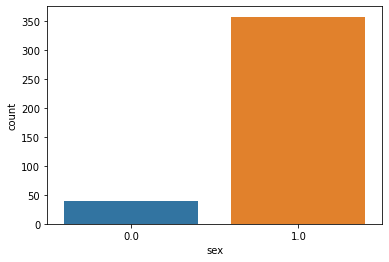

In [14]:
ax= sns.countplot(x='sex',data=data_visualization_nominal)
print(data_visualization_nominal['sex'].value_counts())

In [15]:
data_visualization_ordinal=data[["rank","discipline"]].copy()

In [16]:
data_visualization_ordinal.columns

Index(['rank', 'discipline'], dtype='object')

2.0    266
1.0     67
0.0     64
Name: rank, dtype: int64


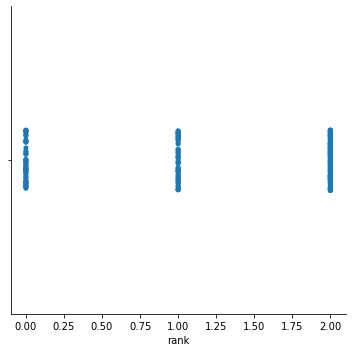

In [17]:
sns.catplot(x='rank',data=data_visualization_ordinal)
print(data_visualization_ordinal['rank'].value_counts())

1.0    216
0.0    181
Name: discipline, dtype: int64


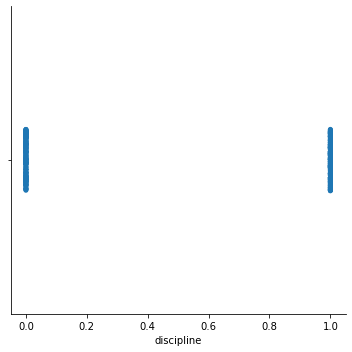

In [18]:
sns.catplot(x='discipline',data=data_visualization_ordinal)
print(data_visualization_ordinal['discipline'].value_counts())

In [19]:
data_visualization_continuous=data[['yrs.since.phd','yrs.service','salary']].copy()

In [20]:
data_visualization_continuous.columns

Index(['yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

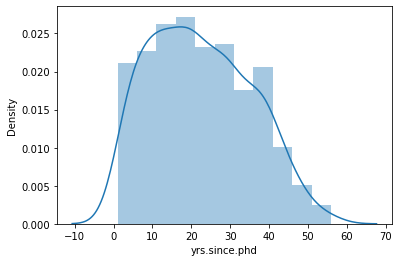

In [21]:
sns.distplot(data_visualization_continuous['yrs.since.phd'],kde=True)

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

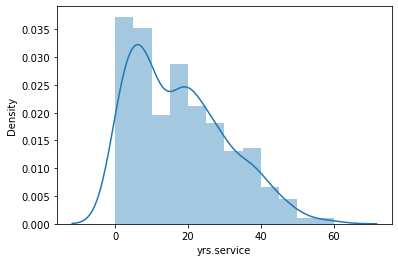

In [22]:
sns.distplot(data_visualization_continuous['yrs.service'],kde=True)

<AxesSubplot:xlabel='salary', ylabel='Density'>

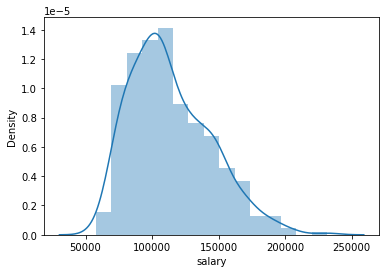

In [23]:
sns.distplot(data_visualization_continuous['salary'],kde=True)

In [24]:
data.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

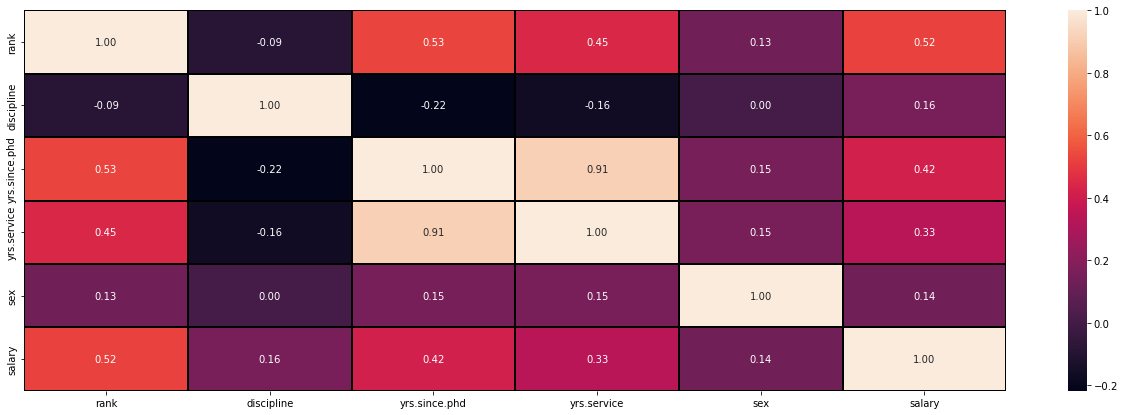

In [25]:
# Checking the correlation with Target variable

plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')

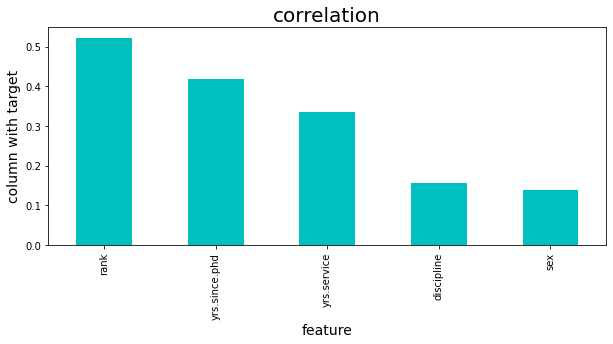

In [26]:
plt.figure(figsize=(10,4))
data.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target',fontsize=14)
plt.title("correlation",fontsize=20)
plt.show()

In [27]:
data.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

<AxesSubplot:>

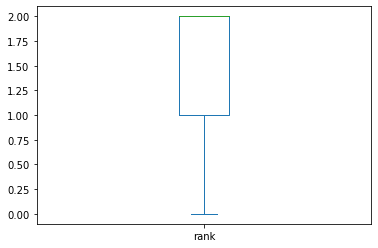

In [28]:
data['rank'].plot.box()

<AxesSubplot:>

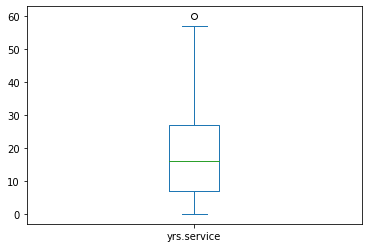

In [29]:
data['yrs.service'].plot.box()

<AxesSubplot:>

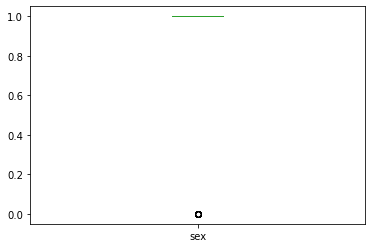

In [30]:
data['sex'].plot.box()

<AxesSubplot:>

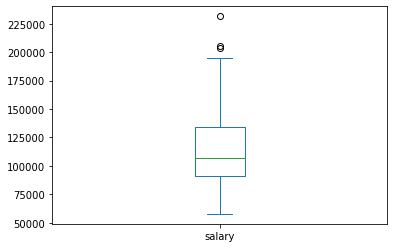

In [31]:
data['salary'].plot.box()

In [32]:
# zscore

z= np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [33]:
data_new=data[(z<3).all(axis=1)]

In [34]:
print("Old data frame:",data.shape)
print("New data frame:",data_new.shape)
print("Total dropped rows:",data.shape[0]-data_new.shape[0])

Old data frame: (397, 6)
New data frame: (354, 6)
Total dropped rows: 43


In [35]:
data_loss=(397-354)/397*100
print(data_loss,'%')

10.831234256926953 %


#                                                 Modeling

In [36]:
x=data.drop(['salary'],axis=1)

y=data['salary']

In [37]:
lr=LinearRegression()

In [ ]:
# Not use standardized because categorical data is large

In [57]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print(f"random_state {i},the training accuracy is:",round(r2_score(y_train,pred_train)*100,1))
        print(f"random_state {i},the test accuracy is:",round(r2_score(y_test,pred_test)*100,1))
        print("\n")

random_state 283,the training accuracy is: 37.2
random_state 283,the test accuracy is: 37.2


random_state 309,the training accuracy is: 36.9
random_state 309,the test accuracy is: 36.9


random_state 772,the training accuracy is: 36.9
random_state 772,the test accuracy is: 36.9


random_state 883,the training accuracy is: 37.3
random_state 883,the test accuracy is: 37.3




In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=883)

In [59]:
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
y_pred=lr.predict(x_train)

In [61]:
accuracy=r2_score(y_train,y_pred)
print("R square score for trained data",accuracy)

R square score for trained data 0.3728129606997769


In [62]:
y_test_pred=lr.predict(x_test)

In [63]:
accuracy=r2_score(y_test,y_test_pred)
print("R square score for test data",accuracy)

R square score for test data 0.3727553173406666


In [64]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.3270801167406512


At cross fold 3 the cv score is 0.3203328673059879


At cross fold 4 the cv score is 0.3218196693768362


At cross fold 5 the cv score is 0.29569928663871775


At cross fold 6 the cv score is 0.33096341839295546


At cross fold 7 the cv score is 0.3257704419996536


At cross fold 8 the cv score is 0.3310060584513582


At cross fold 9 the cv score is 0.3043911239889371




In [65]:
lrscore=cross_val_score(lr,x,y,cv=8)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 33.100605845135824


In [66]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_test=lr.predict(x_test)

lrs=r2_score(y_test,pred_test)
print("R2 score:",lrs*100)

lrscore=cross_val_score(lr,x,y,cv=8)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

R2 score: 37.27553173406666
cross val score: 33.100605845135824


In [68]:
from sklearn.linear_model import Lasso

In [69]:
parameters={'alpha':[.001,0.001,.01,1,10],'random_state':list(range(0,1))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [73]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_test)*100
lss

37.27553173406666

In [71]:
cv_score=cross_val_score(ls,x,y,cv=8)
lsc=cv_score.mean()
print('cross val score:',lsc*100)

cross val score: 33.10060609294926


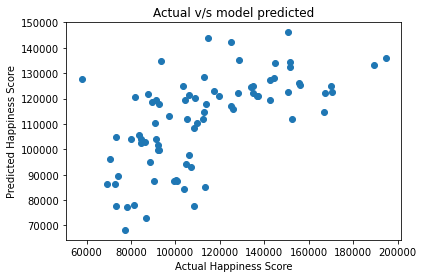

In [72]:
plt.scatter(y_test,pred_test)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual v/s model predicted')
plt.show()

In [74]:
Output_data=pd.DataFrame({'Actual data':y_test,"Predicted data":pred_test})
Output_data

,Actual data,Predicted data
51,108875,120386.851510
139,152664,111928.432622
315,84716,102376.524837
136,108262,108482.354484
302,170500,122694.065658
...,...,...
370,78182,77095.288369
151,92000,99540.836839
37,86373,102953.643792
235,81700,120452.132207
